In [54]:
import pandas as pd
import numpy as np 

In [106]:
counts=pd.read_csv("coverage.counts.txt",header=None,sep='\t')

In [107]:
counts.head()

,0,1,2,3
0,chr1,55880,56880,196.0
1,chr1,628644,629644,29869.0
2,chr1,629296,630296,82801.0
3,chr1,629892,630892,41832.0
4,chr1,630619,631619,32133.0


In [108]:
counts.sort_values(by=[3],ascending=False).head(n=30)

,0,1,2,3
2,chr1,629296,630296,82801.0
6,chr1,633535,634535,55548.0
3,chr1,629892,630892,41832.0
5,chr1,632061,633061,35074.0
4,chr1,630619,631619,32133.0
1,chr1,628644,629644,29869.0
75858,chr17,22520940,22521940,27653.0
7,chr1,634358,635358,20212.0
154484,chr5,134926591,134927591,18456.0
163524,chr6,52503699,52504699,18311.0


In [109]:
outliers=counts.loc[counts[3]>4508]

In [110]:
outliers.shape

(2067, 4)

In [111]:
outliers.to_csv("outliers.tsv",header=False,index=False,sep='\t')

In [85]:
max(counts[3])

82801.0

In [86]:
min(counts[3])

0.0

In [87]:
np.median(counts[3])

266.0

In [88]:
np.mean(counts[3])

582.6035071925036

In [89]:
np.std(counts[3])

922.3233926911976

In [90]:
counts.shape

(206604, 4)

In [91]:
from scipy.stats import iqr

In [92]:
counts_iqr=iqr(counts[3])

In [93]:
counts_iqr

406.0

In [94]:
counts_asinh=np.arcsinh(counts[3])

In [95]:
counts_log10=np.log10(counts[3]+0.001)

In [96]:
counts_log2=np.log2(counts[3]+0.001)

<Figure size 2000x1280 with 0 Axes>

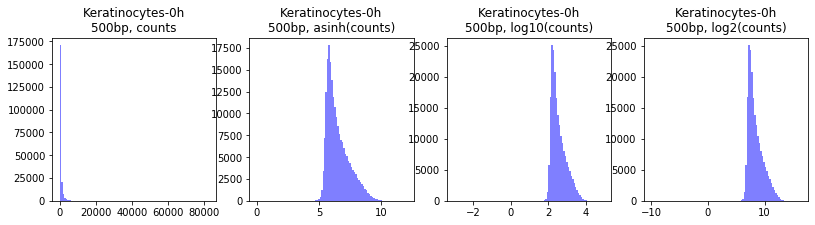

In [97]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 16), dpi= 80, facecolor='w', edgecolor='k')

figure, axes = plt.subplots(figsize=(14,3),nrows=1,ncols=4)
num_bins = 100
# the histogram of the data
axes[0].hist(counts[3], num_bins, facecolor='blue', alpha=0.5)
axes[0].set_title('Keratinocytes-0h\n500bp, counts')
axes[1].hist(counts_asinh, num_bins, facecolor='blue', alpha=0.5,)
axes[1].set_title('Keratinocytes-0h\n500bp, asinh(counts)')
axes[2].hist(counts_log10, num_bins, facecolor='blue', alpha=0.5)
axes[2].set_title('Keratinocytes-0h\n500bp, log10(counts)')
axes[3].hist(counts_log2, num_bins, facecolor='blue', alpha=0.5)
axes[3].set_title('Keratinocytes-0h\n500bp, log2(counts)')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [98]:
counts=counts[3]

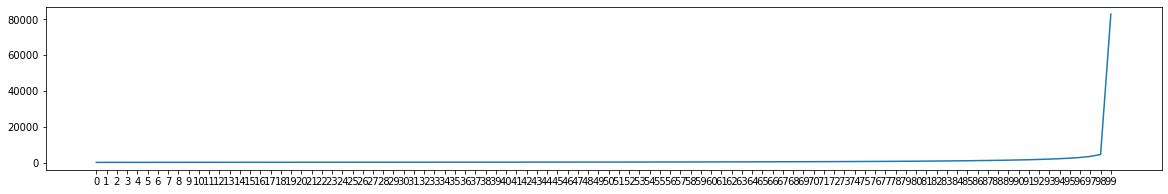

In [99]:
quantiles=np.quantile(counts, np.arange(0.01,1.01,0.01))
figure, axes = plt.subplots(figsize=(20,3),nrows=1)
axes.plot(quantiles)
axes.set_xticks(np.arange(0,100,1))


In [114]:
quantiles[98]


4508.970000000001

In [ ]:
import pandas as pd
counts_df=pd.DataFrame({'chr':chrom,'summit':indices_for_training,'region_start':indices_for_training-500,'region_end':indices_for_training+500,'count':counts})

In [ ]:
counts_df.head()

In [ ]:
counts_df.sort_values(by='count',ascending=False).head(n=20)

In [ ]:
##allchroms

In [ ]:
chroms=[]
medians=[]
means=[] 
stdevs=[] 
mins=[]
maxes=[]
summit_counts=[]
top20=None

In [ ]:
for chrom in list(range(1,23))+['X','Y']:
    chrom='chr'+str(chrom)
    print(chrom)
    tdb_array=tiledb.DenseArray(tdb_path+"."+chrom,mode='r',ctx=ctx)
    vals=tdb_array[:]
    labs=vals[label_attribute]
    ambig=vals[ambig_attribute]
    upsample=vals[upsample_attribute]
    indices_for_training=np.where(np.logical_and(ambig == 0, upsample >= tdb_partition_thresh_for_upsample))[0]
    flank=500
    counts=[] 
    for index in indices_for_training: 
        counts.append(np.sum(labs[index-flank:index+flank]))
    counts=np.array(counts)
    chroms.append(chrom)
    medians.append(np.median(counts))
    means.append(np.mean(counts))
    stdevs.append(np.std(counts))
    mins.append(np.min(counts))
    maxes.append(np.max(counts))
    summit_counts.append(len(counts))
    counts_df=pd.DataFrame({'chr':chrom,
                            'summit':indices_for_training,
                            'region_start':indices_for_training-500,
                            'region_end':indices_for_training+500,
                            'count':counts})
    counts_df_top=counts_df.sort_values(by='count',ascending=False).iloc[0:20]
    if top20 is None: 
        top20=counts_df_top 
    else: 
        top20=pd.concat([top20,counts_df_top],axis=0)

In [ ]:
top5


In [ ]:
top20.to_csv("top20_summit_regions_for_5prime_count_K562_DNAse.tsv",sep='\t',header=True,index=False)

In [ ]:
stats_df=pd.DataFrame({'chrom':chroms,
                       'medians':medians,
                      'means':means,
                      'stdevs':stdevs,
                      'min':mins,
                      'max':maxes,
                      'numpeaks':summit_counts})



In [ ]:
stats_df.to_csv("stats_df_by_chrom.tsv",header=True,index=False)